In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [4]:
dataset =pd.read_csv("C:\\Users\\ASUS\\Downloads\\zomato.csv\\zomato.csv")

In [7]:
dataset.head()
# first few rows of dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
#to see how many rows and coloumns are there
dataset.shape

(51717, 17)

In [11]:
#what are the differnt coloumns there axis=0(refers to rows) axis=1(refers coloums)
dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
#remove which all are not that importatnt to me
dataset=dataset.drop(['url','address','phone','dish_liked','reviews_list'],axis=1)
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [15]:
#to provide info aboutt the dataset like how many not null values are there, what are the data types used
dataset.info()
#check rate colum it is less then others

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   menu_item                    51717 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [19]:
#to remove duplicate dataset
dataset.drop_duplicates(inplace=True)
dataset.shape

(51630, 12)

In [21]:
#cleaning each and every column(bcoz /5 is given but i want float value)
#its gonna provide unique values, the values wich are unique
dataset['rate'].unique()
#while running it conatins two string values i.e NEW and - and nan and /5, we have to remove it

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
#removing NEW - /5 from rate column by creating function
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan #replacing it with null value i.e nan
    else:
        value= str(value).split('/') #if its else then split that string value from /
        value=value[0] #value at 0
        return float(value)
    
dataset['rate']=dataset['rate'].apply(handlerate)
dataset['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [26]:
#total null value
dataset.rate.isnull().sum()

10025

In [28]:
#handleing the null values
#filling null values in rate column with mean of the rate colmn
dataset['rate'].fillna(dataset['rate'].mean(),inplace= True)#inplace ture means i want to make change in original dataframe not want to make new
dataset['rate'].isnull().sum()

0

In [31]:
dataset.info()
#location rest type,cusisins have null value so drop bcos they dont have so many null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51630 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51630 non-null  object 
 1   online_order                 51630 non-null  object 
 2   book_table                   51630 non-null  object 
 3   rate                         51630 non-null  float64
 4   votes                        51630 non-null  int64  
 5   location                     51609 non-null  object 
 6   rest_type                    51403 non-null  object 
 7   cuisines                     51585 non-null  object 
 8   approx_cost(for two people)  51286 non-null  object 
 9   menu_item                    51630 non-null  object 
 10  listed_in(type)              51630 non-null  object 
 11  listed_in(city)              51630 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


In [33]:
dataset.dropna(inplace= True)
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [35]:
#if there are so many unquie vaalue then we have to handle it as well
dataset.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
#since column names are lengthy so rename
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [36]:
#if we want to find how many unique coloumns are there in location coloumn
dataset['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [37]:
dataset['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [38]:
#since both have city names only we gonna drop it
dataset = dataset.drop(['listed_in(city)'], axis = 1)

In [39]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet


In [40]:
#as we can see every value is conating comma in following we can say that is restricing it from becoming a integer
#it is a string 
##remove comma

In [41]:
dataset['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [44]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '') #replace comma with empty
        return float(value)
    else:
        return float(value) #if no comma is there i want to repturn float value only
    
dataset['Cost2plates'] = dataset['Cost2plates'].apply(handlecomma)
dataset['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [45]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet


In [157]:
#analsying rest type
#clean restraunt type wherther fine dine or cafe

In [49]:
dataset['rest_type'].value_counts()

Quick Bites                   19015
Casual Dining                 10257
Cafe                           3683
Delivery                       2574
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [47]:
rest_types = dataset['rest_type'].value_counts(ascending  = False)

rest_types

Quick Bites                   19015
Casual Dining                 10257
Cafe                           3683
Delivery                       2574
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [52]:
#all the resturant having less than 1000 types
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            412
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [53]:
#Making Rest Types less than 1000 in frequency as others

In [55]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others' #if the type is presnt in list above then return others
    else:
        return value
        
dataset['rest_type'] = dataset['rest_type'].apply(handle_rest_type)
dataset['rest_type'].value_counts()

Quick Bites           19015
Casual Dining         10257
others                 9009
Cafe                   3683
Delivery               2574
Dessert Parlor         2245
Takeaway, Delivery     2009
Bakery                 1140
Casual Dining, Bar     1131
Name: rest_type, dtype: int64

In [56]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet


In [57]:
#cleaning location

In [58]:
dataset['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [59]:
#there are few locations having less resteraunts thus create a varibale for less
#than 300 as others if the value is present in list
location = dataset['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
dataset['location'] = dataset['location'].apply(handle_location)
dataset['location'].value_counts()

BTM                      5056
others                   4955
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2027
Jayanagar                1916
Marathahalli             1806
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1215
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1014
Banashankari              902
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              723
Frazer Town               716
Basavanagudi              684
Residency Road            672
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             568
Lavelle Ro

In [60]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet


In [61]:
#Cleaning Cuisines Column

In [62]:
cuisines = dataset['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
dataset['cuisines'] = dataset['cuisines'].apply(handle_cuisines)
dataset['cuisines'].value_counts()

others                                 26171
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [63]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,[],Buffet


In [65]:
dataset['Type'].value_counts()

Delivery              25597
Dine-out              17565
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

In [66]:
#data is cleaned lets jump to visulaisation

In [68]:
#count plot for various locations 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

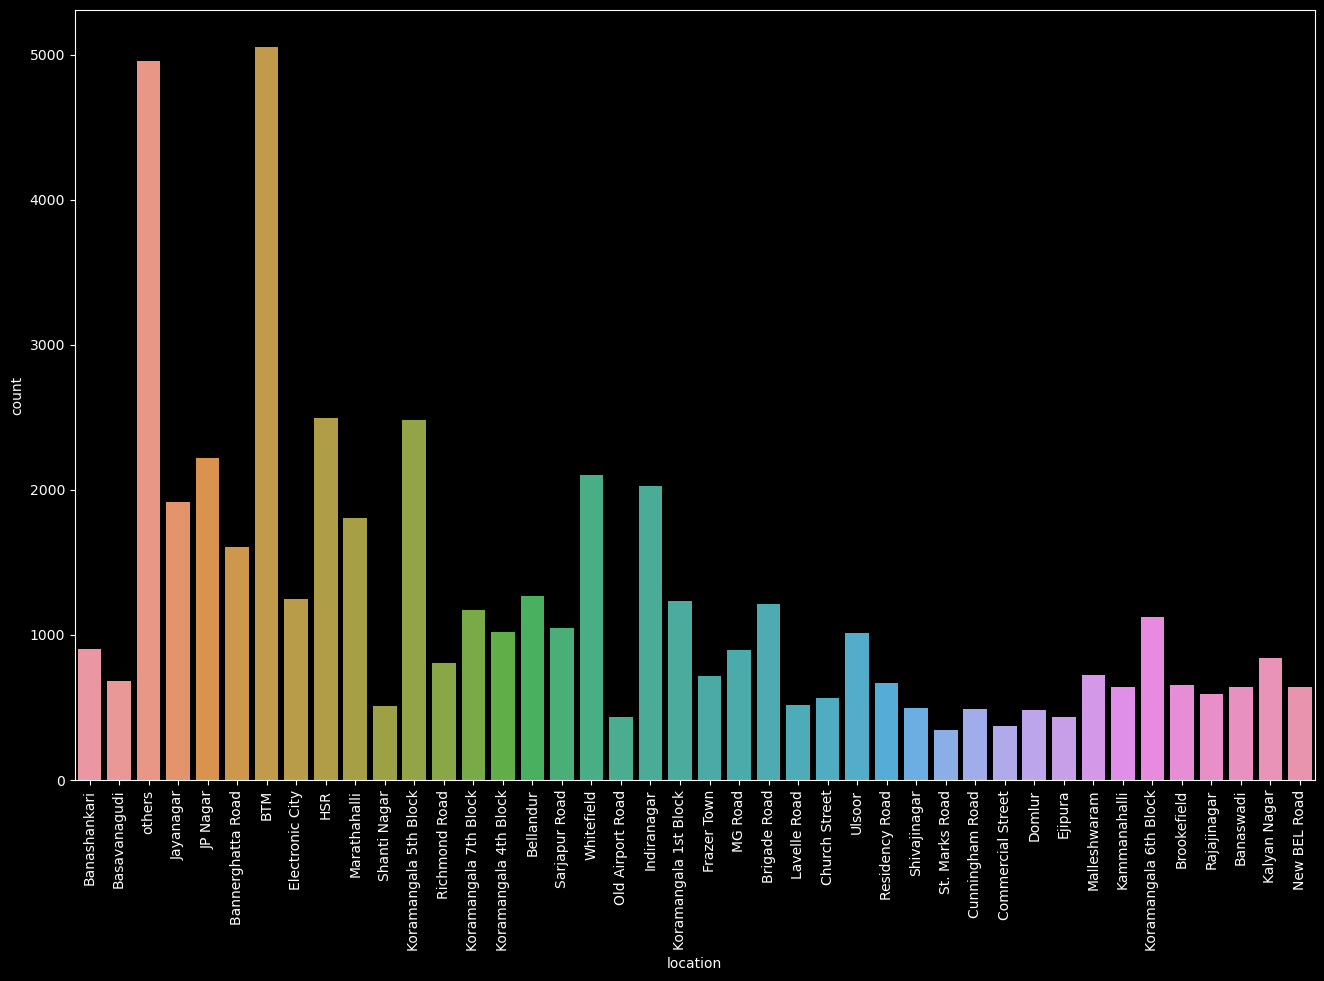

In [74]:
plt.figure(figsize = (16,10))
ax = sns.countplot(dataset['location'])
plt.xticks(rotation=90)#if we dont write this,all the text will colide with each other

In [75]:
#in the above we can see, max number of resteruant is present in btm location
#so, if i want to open a resteruant i should not open it in btm coz of copmpition

In [77]:
#visualising the online order
#that how many bare having online facility and how many do not have it

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

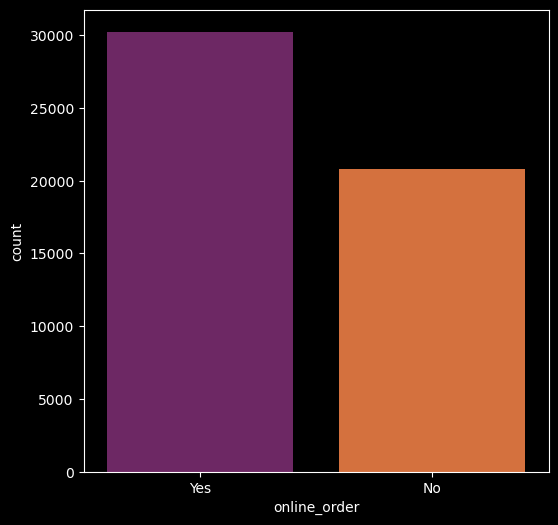

In [78]:
plt.figure(figsize=(6,6))
sns.countplot(dataset['online_order'],palette='inferno')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

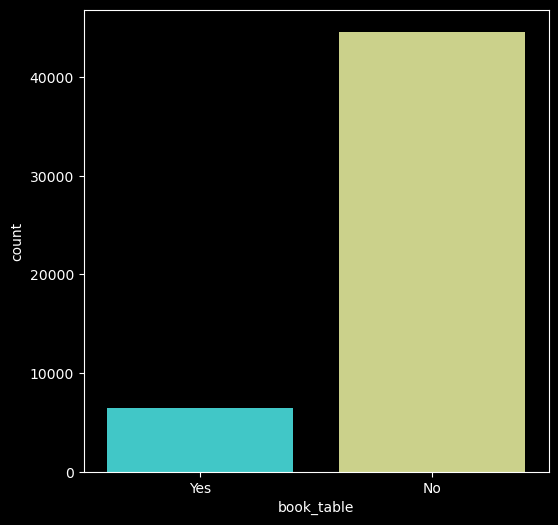

In [79]:
#visulaising book table
plt.figure(figsize = (6,6))
sns.countplot(dataset['book_table'], palette = 'rainbow')

In [80]:
#visualising online order vs rate
#if the resteruant is having online order facility is the rate hugh

<AxesSubplot:xlabel='online_order', ylabel='rate'>

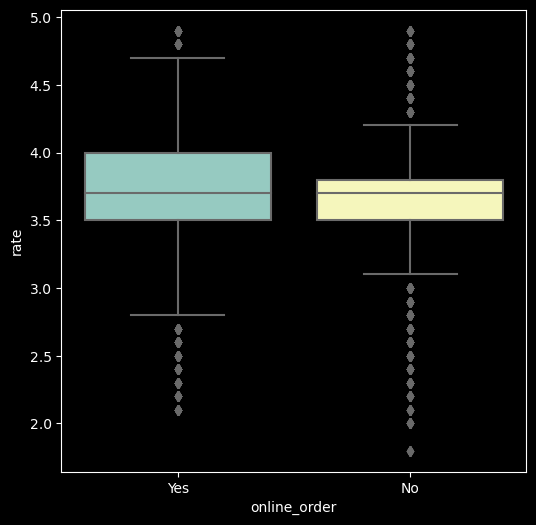

In [83]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataset)

In [87]:
#here we can observe that rest having online otreder facility have higher rates than thje rest not havimng online facility
#this rate is noty price it is the rating people have given out of 5
#the middle line is the avg rating
#since avg rating is similar we cant compare,but for max rating online have more

In [88]:
#visualising book table vs rate

<AxesSubplot:xlabel='book_table', ylabel='rate'>

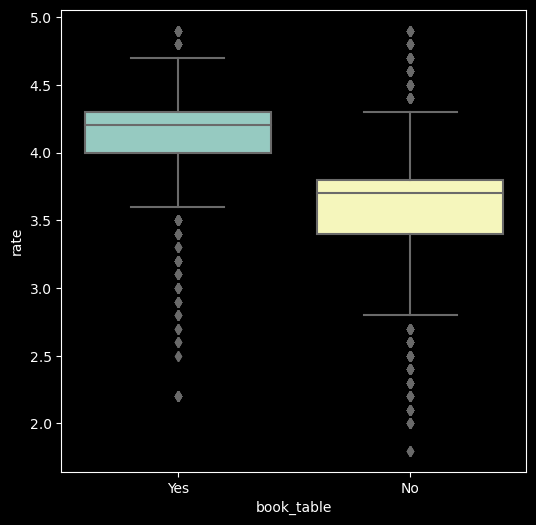

In [90]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=dataset)

In [91]:
#since here is the huge differnce between the avg so we can conclude that we should keep online table booking optionif we open a rest

In [93]:
#visulaising online order facility,location wise
#we should open the rest at that place where these facility are low

In [96]:
#want to group my data location wise
ds1 = dataset.groupby(['location','online_order'])['name'].count()
ds1.to_csv('location_online.csv') #create new csv for it
ds1 = pd.read_csv('location_online.csv')
#now creating a pivoit table(where we can visulise and analyse two columns)
ds1 = pd.pivot_table(ds1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
ds1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   663
Brookefield             239   417
Church Street           226   342
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   429
HSR                     584  1910
Indiranagar             697  1330
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   204
MG Road                 520   374
Malleshwaram            309   414
Marathahalli            701  1105
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   248
Richmond Road           557   247
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   625
Whitefield              986  1119
others                 2064  2891

In [97]:
#in this we can observe that there(at BTM) are 1763 rest which do not provide online facility and 3293 does

In [98]:
#we can also visulaise using plot

<AxesSubplot:xlabel='location'>

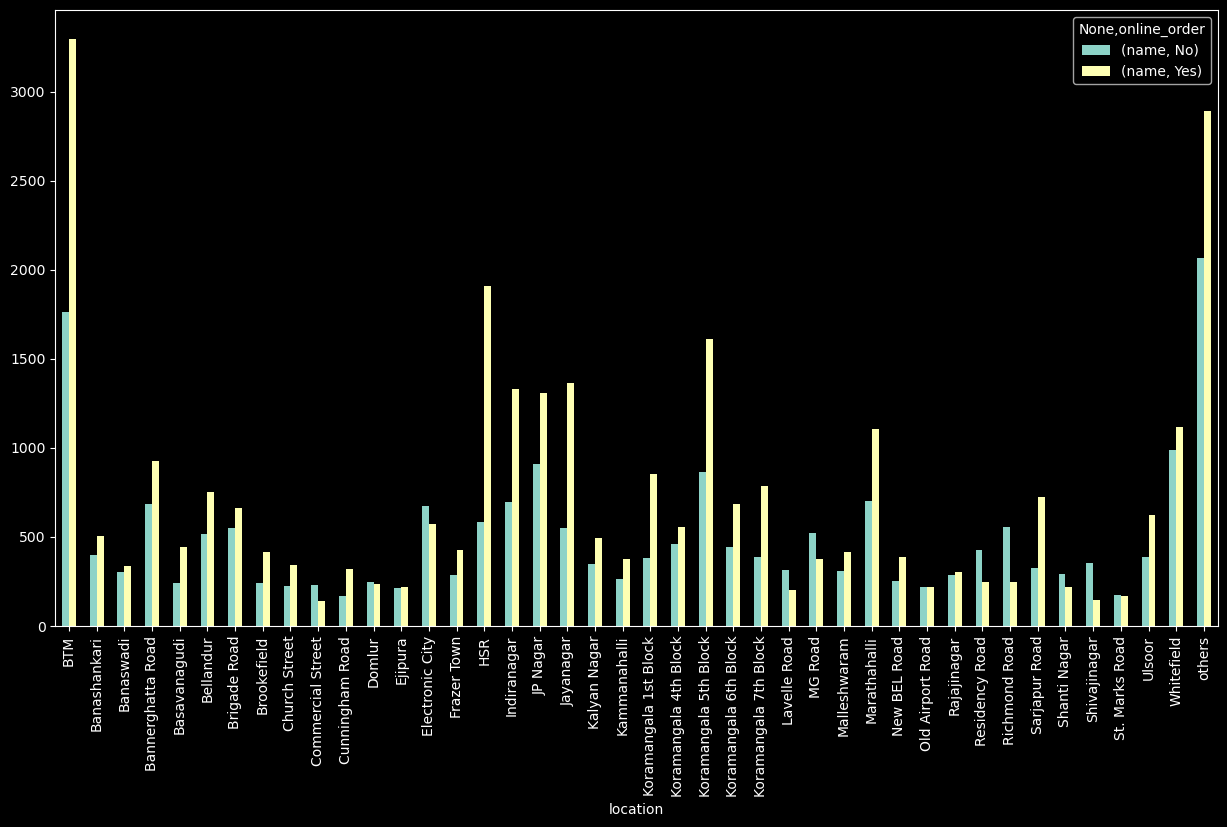

In [99]:
ds1.plot(kind='bar',figsize=(15,8))

In [100]:
#visulaising book table facility,locationwise

In [101]:
ds2 = dataset.groupby(['location','book_table'])['name'].count()
ds2.to_csv('location_booktable.csv')
ds2 = pd.read_csv('location_booktable.csv')
ds2 = pd.pivot_table(ds2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
ds2


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1037  178
Brookefield             582   74
Church Street           387  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             708    8
HSR                    2277  217
Indiranagar            1578  449
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  229
MG Road                 547  347
Malleshwaram            634   89
Marathahalli           1642  164
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          523  149
Richmond Road           688  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  837  177
Whitefield             1852  253
others                 4587  368

<AxesSubplot:xlabel='location'>

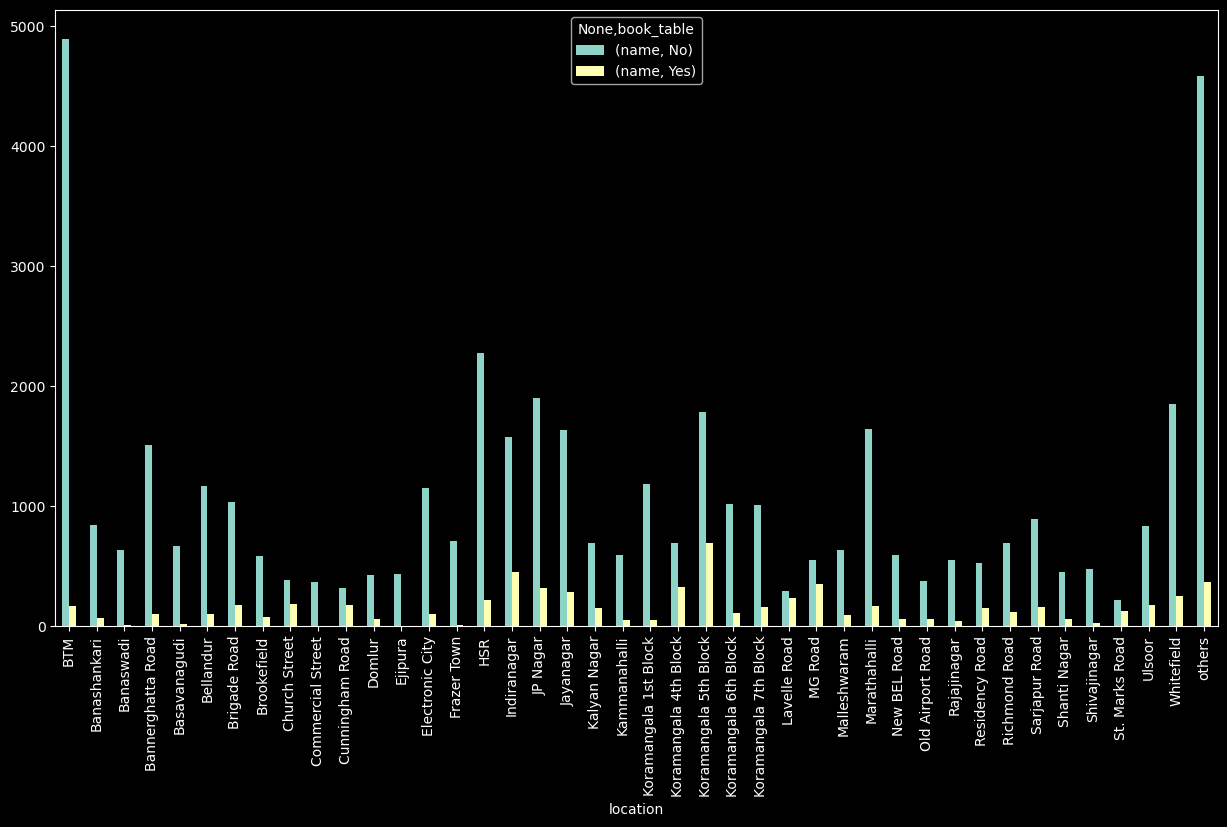

In [102]:
ds2.plot(kind = 'bar', figsize = (15,8))

In [103]:
#visulaising types of resteruant vs rate
#here we can see which among the following have max rating

<AxesSubplot:xlabel='Type', ylabel='rate'>

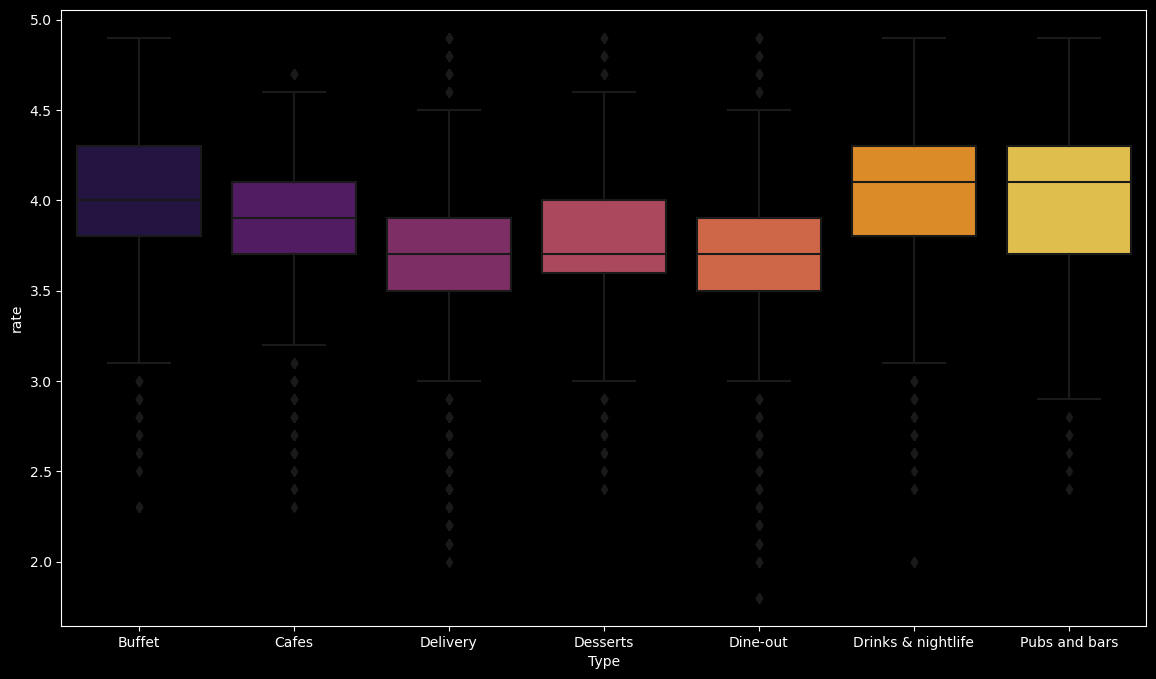

In [104]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = dataset, palette = 'inferno')

In [106]:
#people are loving drinks and night life qas avg rating is heighest

In [107]:
#grouping types of resteraunt, location wise
#which type of rest is present in which location max and min number of times

In [109]:
ds3 = dataset.groupby(['location','Type'])['name'].count()
ds3.to_csv('location_Type.csv')
ds3 = pd.read_csv('location_Type.csv')
ds3 = pd.pivot_table(ds3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
ds3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      502      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      195       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      472       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      530   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      128       50      191   
MG Road                   51    76      267       68      343   
Malleshwaram              11    31      271       85      291   
Marathahalli              34    32      980      105      631   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      188       63      289   
Richmond Road             63    21      258       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      459       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1554   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<AxesSubplot:xlabel='location'>

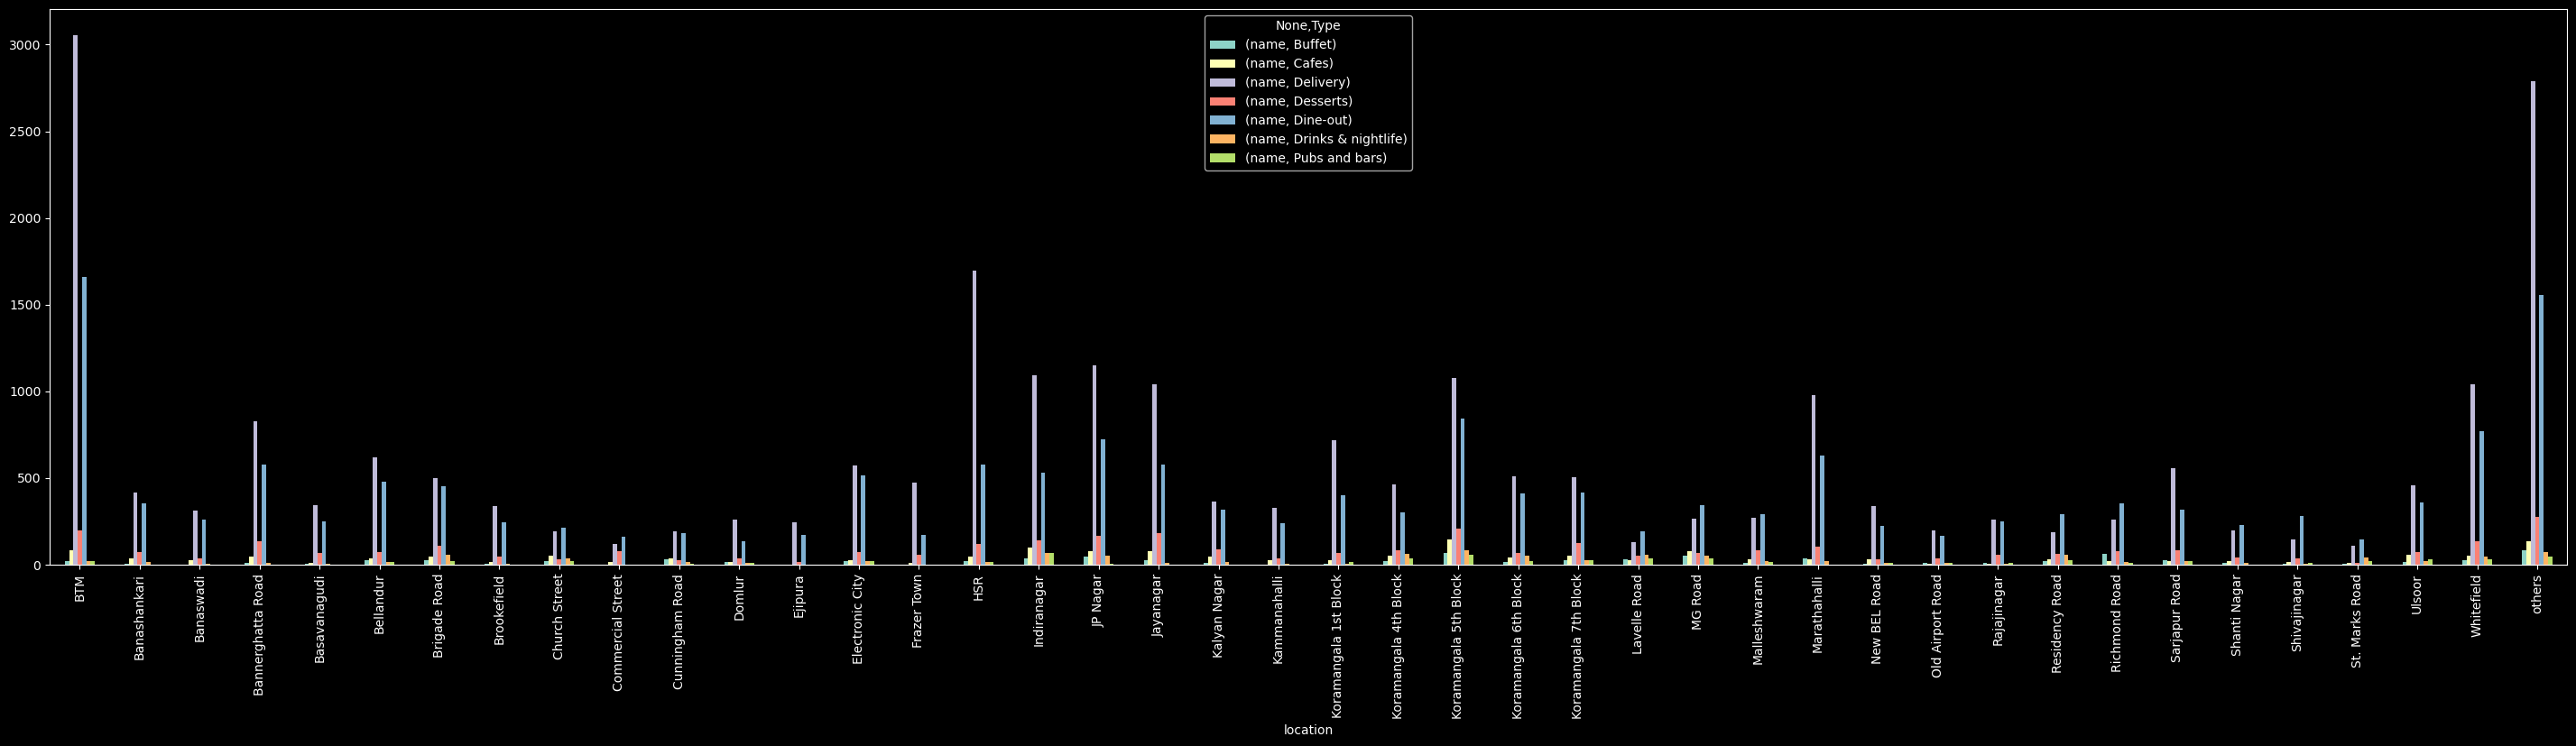

In [110]:
ds3.plot(kind = 'bar', figsize = (36,8))

In [111]:
#since in shivavgi nagar pubs are bars are very less in so we can open there

In [113]:
#no. of votes
#(in which location people  are voting more)

In [115]:
ds4 = dataset[['location', 'votes']]#(in which loaction people are interested in voting)
ds4.drop_duplicates()
ds5 = ds4.groupby(['location'])['votes'].sum()
ds5 = ds5.to_frame()
ds5 = ds5.sort_values('votes', ascending=False)
ds5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,592055
JP Nagar,586522


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

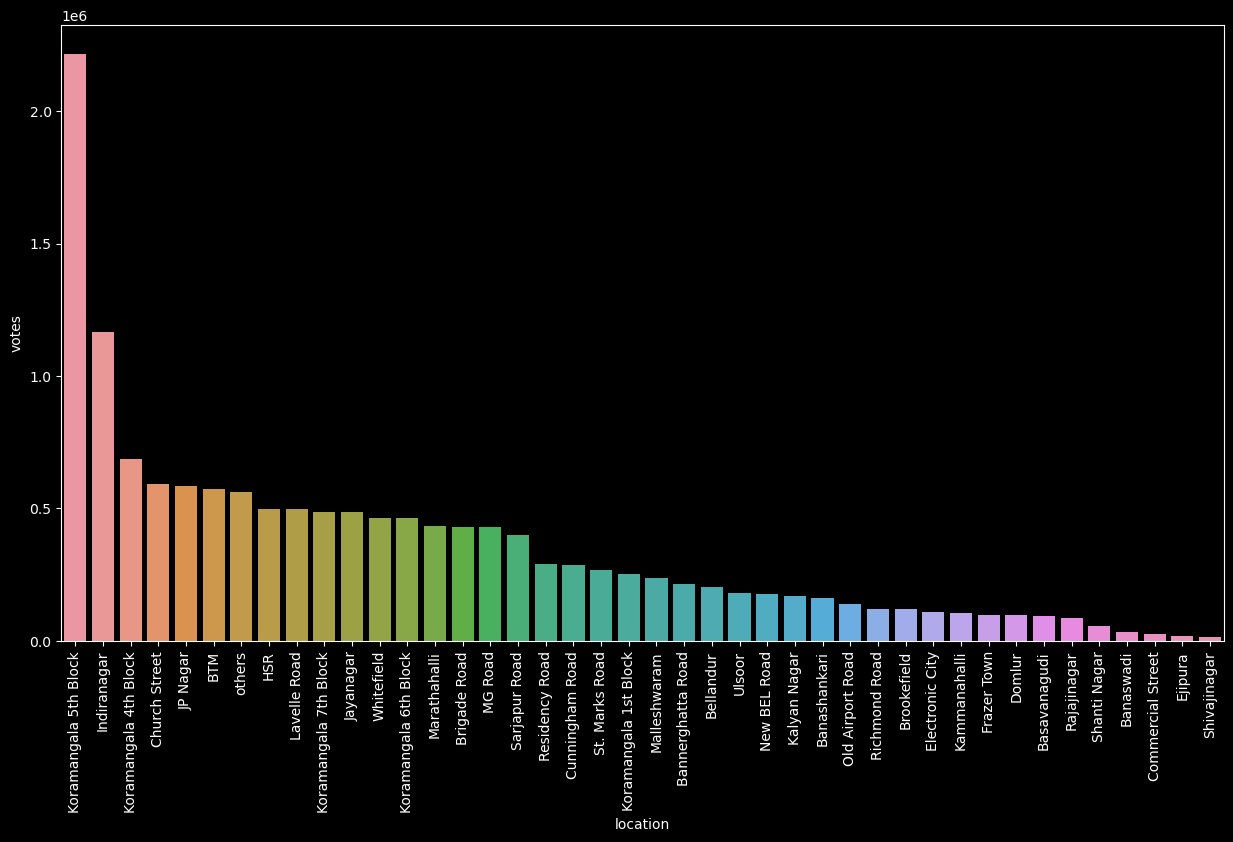

In [116]:
plt.figure(figsize = (15,8))
sns.barplot(ds5.index , ds5['votes'])
plt.xticks(rotation = 90)

In [117]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,[],Buffet


In [118]:
#visulaising top cuisines
#if want to open a rest wha cuisine should one choose

In [119]:
ds6 = dataset[['cuisines', 'votes']]
ds6.drop_duplicates()
ds7 = ds6.groupby(['cuisines'])['votes'].sum()
ds7 = ds7.to_frame()
ds7 = ds7.sort_values('votes', ascending=False)
ds7.head()

,votes
cuisines,
others,11549105
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [120]:
ds7 = ds7.iloc[1:, :] #since i dont want others in plot so start ds7 with index 7
ds7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

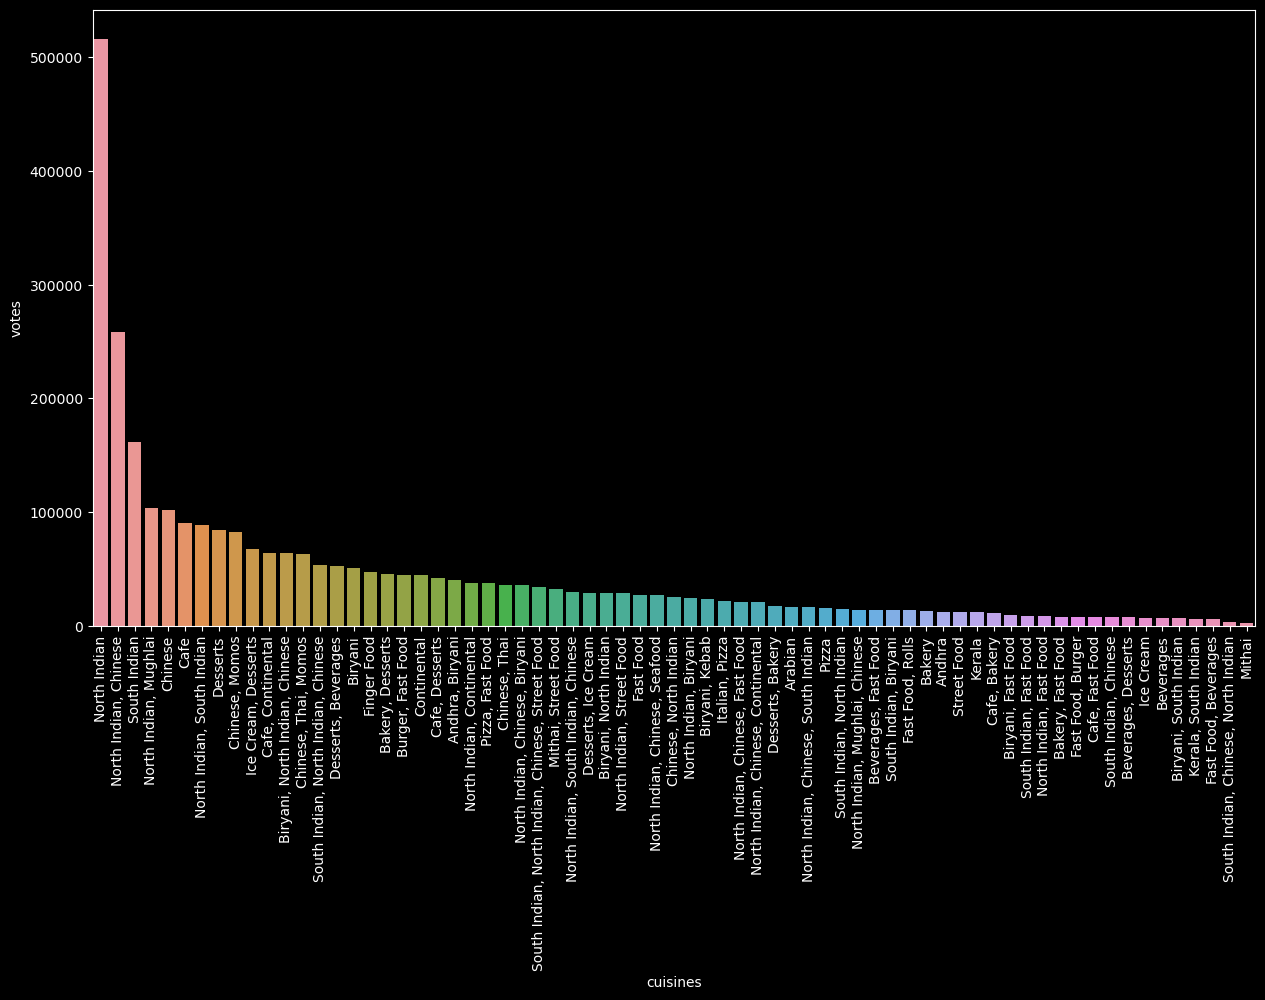

In [122]:
plt.figure(figsize = (15,8))
sns.barplot(ds7.index , ds7['votes'])
plt.xticks(rotation = 90)

In [130]:
#rating prediction
#linear regression

In [127]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in dataset.select_dtypes(include = object).columns.tolist():
    dataset[column] = encoder.fit_transform(dataset[column])
dataset.sample(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,menu_item,Type
39930,549,0,0,3.3,5,14,6,69,250.0,9062,2
25424,7629,1,0,3.6,30,41,6,69,400.0,9062,2
48771,5583,0,0,3.6,14,33,8,69,800.0,9062,5


In [132]:
from sklearn.model_selection import train_test_split
Target = dataset["rate"]
training = dataset.drop(columns = ["rate"])
X_train, X_test, y_train, y_test = train_test_split(training, Target, test_size = 0.3, random_state = 42)
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (35744, 10)
x_test shape:  (15319, 10)
y_train shape:  (35744,)
y_test shape:  (15319,)


In [134]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

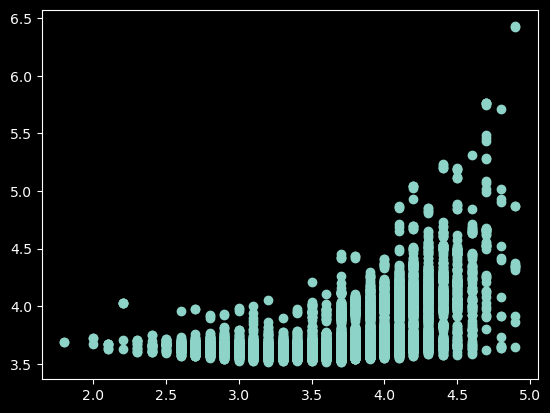

In [135]:
lm.fit(X_train,y_train)
lm.score(X_train, y_train)
predict1 = lm.predict(X_test)
plt.scatter(y_test, predict1)
plt.show()

In [137]:
from sklearn.metrics import r2_score
r2_score(y_test,predict1)

0.2631709261365357

In [138]:
#random forest

In [141]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [142]:
predict = model.predict(X_test)

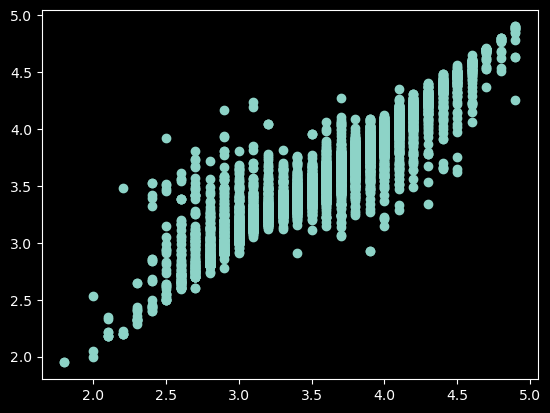

In [143]:
plt.scatter(y_test, predict)
plt.show()

In [155]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.9109096288813346

In [149]:
#model 3- SVM

In [150]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)

SVR()

In [153]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 0.2368295498011267
Mean Squared Error: 0.11037335322130287
Root Mean Squared Error: 0.33222485340700036
R2 Score: 0.2999130328495866
